length of target:  28
avrg. number of iterations:  244.6


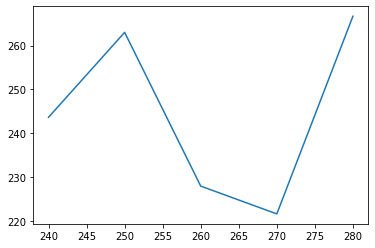

In [8]:
# evolutionary algo: eval aspect impact (mut, mate, fit, length, repro rate)
from string import ascii_letters
from random import choice, random
import matplotlib.pyplot as plt
import math

def fitness(trial, target):
    'Sum of matching chars by position - essentially the dot product'
    return sum(t==h for t,h in zip(trial, target))
    #return sum([sum([trl[i]==tgt[i+w] for w in range(-1,2)]) for i in range(1,len(trl)-1)]) # window
    #return sum((ord(t)*math.log(ord(h)+0.001) for t,h in zip(trial, target))) # cross entropy

def mutaterate(parent, target, perfectfitness, minmutaterate):
    'Less mutation the closer the fit of the parent'
    return 1 - ((perfectfitness - fitness(parent, target)) / perfectfitness * (1 - minmutaterate))

def mutate(parent, rate, charset):
    '''take character from parent or choose a random character from the vocabulary'''
    return [(ch if random() <= rate else choice(charset)) for ch in parent] # below rate char survives, otherwise choose

def que(iterations, parent, target, perfectfitness):
    '(from the favourite saying of Manuel in Fawlty Towers)'
    print ("#%-4i, fitness: %4.1f%%, '%s'" %
           (iterations, fitness(parent, target)*100./perfectfitness, ''.join(parent)))

def mate(a, b, target, splice_rt=7):
    '''combine genes by splicing a and b at a random position'''
    place = 0
    if choice(range(10)) < splice_rt: # splice rate
        place = choice(range(len(target)))
        #fa = fitness(a, target) # this logic improves iterations by about 20%
        #fb = fitness(b, target)
        #place = int(fa / (fa+fb) * len(target) )
    else:
        return a, b
    return a, b, a[:place] + b[place:], b[:place] + a[place:] # splice a and b

def evorun(C, parent, charset, target, splice_rt, perfectfitness, minmutaterate):
    '''a set of runs with given parameters'''
    iterations = 0
    center = int(len(C)/2)
    while parent != target and iterations < 1000:
        rate = mutaterate(parent, target, perfectfitness, minmutaterate)
        iterations += 1
        #if iterations % 100 == 0: que(iterations, parent, target, perfectfitness)
        copies = [ mutate(parent, rate, charset) for _ in C ]  + [parent] # create a set of copies, but mutated
        parent1 = max(copies[:center], key=lambda x: fitness(x, target)) # best parent from lower half
        parent2 = max(copies[center:], key=lambda x: fitness(x, target)) # best parent from upper half
        parent = max(mate(parent1, parent2, target, splice_rt), key=lambda x: fitness(x, target)) # choose best mutation from both bet parents
    #que(iterations, parent, target, perfectfitness)
    return (iterations)
    
def main():
    target  = list("METHINKS IT IS LIKE A WEASEL")
    print('length of target: ', len(target))
    charset = ascii_letters + ' '
    parent  = [choice(charset) for _ in range(len(target))] # random init choice
    minmutaterate  = .09
    #C = range(200)
    perfectfitness = float(len(target))
    splice_rt = 8
    #C_base = [25,50,100,200,300]
    C_base = [240,250,260,270,280]
    #C_base = [250, 270]
    C_rg = [range(x) for x in C_base]
    niter = []
    ntrls = 3
    #for sr in [1,2,3,4,5,6,7,8,9]:
    for cc in C_rg:
        navrg = 0.
        for _ in range(ntrls):
            navrg += evorun(cc, parent, charset, target, splice_rt, perfectfitness, minmutaterate)
        niter.append(navrg / ntrls)
    #niter = [niter[i] / C_base[i] for i in range(len(niter))] # scale by computational complexity of gene length
    print('avrg. number of iterations: ', sum(niter) / len(C_base))
    plt.plot(C_base, niter)
    #plt.plot([1,2,3,4,5,6,7,8,9], niter)
    plt.show()

if __name__ == '__main__':
    main()

In [7]:
# happy numbers

def happyn(n):
    '''return true if n is happy'''
    past = set()
    while n != 1:
        n = sum(int(i)**2 for i in str(n))
        if n in past:
            return False
        past.add(n)
    return True

def main():
    print([x for x in range(500) if happyn(x)])

if __name__ == '__main__':
    main()

[1, 7, 10, 13, 19, 23, 28, 31, 32, 44, 49, 68, 70, 79, 82, 86, 91, 94, 97, 100, 103, 109, 129, 130, 133, 139, 167, 176, 188, 190, 192, 193, 203, 208, 219, 226, 230, 236, 239, 262, 263, 280, 291, 293, 301, 302, 310, 313, 319, 320, 326, 329, 331, 338, 356, 362, 365, 367, 368, 376, 379, 383, 386, 391, 392, 397, 404, 409, 440, 446, 464, 469, 478, 487, 490, 496]


length of target:  10
avrg. number of iterations:  126.99999999999997


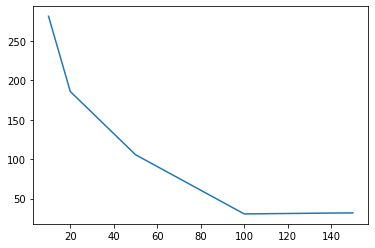

length of target:  20
avrg. number of iterations:  487.8


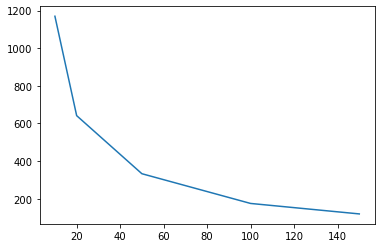

length of target:  30
avrg. number of iterations:  882.0


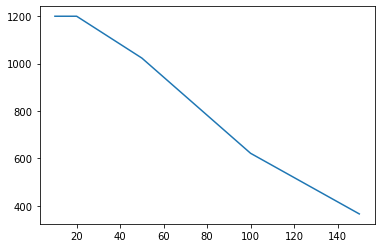

length of target:  40
avrg. number of iterations:  1200.0


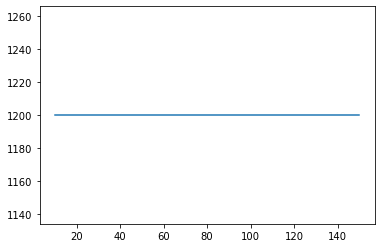

In [16]:
# evolutionary algo: relate target length and gene length
from string import ascii_letters
from random import choice, random
import matplotlib.pyplot as plt
import math

def fitness(trial, target):
    'Sum of matching chars by position - essentially the dot product'
    return sum(t==h for t,h in zip(trial, target))
    #return sum([sum([trl[i]==tgt[i+w] for w in range(-1,2)]) for i in range(1,len(trl)-1)]) # window
    #return sum((ord(t)*math.log(ord(h)+0.001) for t,h in zip(trial, target))) # cross entropy

def mutaterate(parent, target, perfectfitness, minmutaterate):
    'Less mutation the closer the fit of the parent'
    return 1 - ((perfectfitness - fitness(parent, target)) / perfectfitness * (1 - minmutaterate))

def mutate(parent, rate, charset):
    '''take character from parent or choose a random character from the vocabulary'''
    return [(ch if random() <= rate else choice(charset)) for ch in parent] # below rate char survives, otherwise choose

def que(iterations, parent, target, perfectfitness):
    '(from the favourite saying of Manuel in Fawlty Towers)'
    print ("#%-4i, fitness: %4.1f%%, '%s'" %
           (iterations, fitness(parent, target)*100./perfectfitness, ''.join(parent)))

def mate(a, b, target, splice_rt=7, mthd=0):
    '''combine genes by splicing a and b at a random position'''
    place = 0
    if choice(range(10)) < splice_rt: # splice rate
        if mthd == 0:
            place = choice(range(len(target)))
        else:
            fa = fitness(a, target) # this logic improves iterations by about 20%
            fb = fitness(b, target)
            place = int(fa / (fa+fb) * len(target) )
    else:
        return a, b
    return a, b, a[:place] + b[place:], b[:place] + a[place:] # splice a and b

def evorun(C, parent, charset, target, splice_rt, perfectfitness, minmutaterate, maxiter=1200):
    '''a set of runs with given parameters'''
    iterations = 0
    center = int(len(C)/2)
    while parent != target and iterations < maxiter:
        rate = mutaterate(parent, target, perfectfitness, minmutaterate)
        iterations += 1
        #if iterations % 100 == 0: que(iterations, parent, target, perfectfitness)
        copies = [ mutate(parent, rate, charset) for _ in C ]  + [parent] # create a set of copies, but mutated
        parent1 = max(copies[:center], key=lambda x: fitness(x, target)) # best parent from lower half
        parent2 = max(copies[center:], key=lambda x: fitness(x, target)) # best parent from upper half
        parent = max(mate(parent1, parent2, target, splice_rt), key=lambda x: fitness(x, target)) # choose best mutation from both bet parents
    #que(iterations, parent, target, perfectfitness)
    return (iterations)
    
def main():
    charset = ascii_letters + ' '
    for thislen in [10, 20, 30, 40]:
        #target  = list("METHINKS IT IS LIKE A WEASEL")
        target = [choice(charset) for _ in range(thislen)]
        print('length of target: ', len(target))
        parent  = [choice(charset) for _ in range(len(target))] # random init choice
        minmutaterate  = .09
        perfectfitness = float(len(target))
        splice_rt = 7
        C_base = [10, 20, 50, 100, 150]
        C_rg = [range(x) for x in C_base]
        niter = []
        ntrls = 3
        #for sr in [1,2,3,4,5,6,7,8,9]:
        for cc in C_rg:
            navrg = 0.
            for _ in range(ntrls):
                navrg += evorun(cc, parent, charset, target, splice_rt, perfectfitness, minmutaterate)
            niter.append(navrg / ntrls)
        #niter = [niter[i] / C_base[i] for i in range(len(niter))] # scale by computational complexity of gene length
        print('avrg. number of iterations: ', sum(niter) / len(C_base))
        plt.plot(C_base, niter)
        #plt.plot([1,2,3,4,5,6,7,8,9], niter)
        plt.show()

if __name__ == '__main__':
    main()

In [1]:
# evolutionary algo: small demo
from string import ascii_letters
from random import choice, random
import matplotlib.pyplot as plt
import math

def fitness(trial, target):
    'Sum of matching chars by position - essentially the dot product'
    return sum(t==h for t,h in zip(trial, target))

def mutaterate(parent, target, perfectfitness, minmutaterate):
    'Less mutation the closer the fit of the parent'
    return 1 - ((perfectfitness - fitness(parent, target)) / perfectfitness * (1 - minmutaterate))

def mutate(parent, rate, charset):
    '''take character from parent or choose a random character from the vocabulary'''
    return [(ch if random() <= rate else choice(charset)) for ch in parent] # below rate char survives, otherwise choose

def que(iterations, parent, target, perfectfitness):
    '(from the favourite saying of Manuel in Fawlty Towers)'
    print ("#%-4i, fitness: %4.1f%%, '%s'" %
           (iterations, fitness(parent, target)*100./perfectfitness, ''.join(parent)))

def mate(a, b, target, OPSCTR, splice_rt=7, mthd=0):
    '''combine genes by splicing a and b at a random position'''
    place = 0
    if choice(range(10)) < splice_rt: # splice rate
        if mthd == 0:
            place = choice(range(len(target)))
        else:
            fa = fitness(a, target) # this logic improves iterations by about 20%
            fb = fitness(b, target)
            place = int(fa / (fa+fb) * len(target) )
    else:
        return a, b
    return a, b, a[:place] + b[place:], b[:place] + a[place:] # splice a and b

def evorun(C, parent, charset, target, splice_rt, perfectfitness, minmutaterate, maxiter=700):
    '''a set of runs with given parameters'''
    iterations = 0
    OPSCTR = []
    center = int(len(C)/2)
    while parent != target and iterations < maxiter:
        nops = 0
        rate = mutaterate(parent, target, perfectfitness, minmutaterate)
        iterations += 1
        if iterations % 100 == 0: que(iterations, parent, target, perfectfitness)
        copies = [ mutate(parent, rate, charset) for _ in C ]  + [parent] # create a set of copies, but mutated
        nops += len(parent)*len(C)
        #print('copies: ', OPSCTR)
        parent1 = max(copies[:center], key=lambda x: fitness(x, target)) # best parent from lower half
        nops += len(target)*len(target)
        #print('parent1: ', OPSCTR)
        parent2 = max(copies[center:], key=lambda x: fitness(x, target)) # best parent from upper half
        nops += len(target)*len(target)
        #print('parent2: ', OPSCTR)
        parent = max(mate(parent1, parent2, target, splice_rt), key=lambda x: fitness(x, target)) # choose best mutation from both bet parents
        nops += len(parent1)*len(target)
        #print('parent: ', OPSCTR)
        OPSCTR.append(nops)
    que(iterations, parent, target, perfectfitness)
    return (iterations, OPSCTR)
   
def main():
    nops = [] # count basic operations
    charset = ascii_letters + ' '
    target = [choice(charset) for _ in range(10)]
    print('target: ', target)
    print('length of target: ', len(target))
    parent  = [choice(charset) for _ in range(len(target))] # random init choice
    minmutaterate  = .09
    perfectfitness = float(len(target))
    splice_rt = 7
    C_base = [3]
    C_rg = [range(x) for x in C_base]
    niter, nops = evorun(C_rg[0], parent, charset, target, splice_rt, perfectfitness, minmutaterate)
    print(nops[0])

if __name__ == '__main__':
    main()

target:  ['D', 'p', 'A', 'v', 'i', 'A', 'B', 'B', 'X', 'Z']
length of target:  10
#100 , fitness: 40.0%, 'DpA wfBwTW'
#200 , fitness: 60.0%, 'DpAFiVBBZl'
#300 , fitness: 70.0%, 'DpAfinOBXZ'
#374 , fitness: 100.0%, 'DpAviABBXZ'
330


In [3]:
# wait for file creation
import os
import time

file_path = r'bsc_resids0.txt'

os.chdir(r'C:\Users\bscho\Documents\DL\lrgtxt0')
print(os.path.isfile(file_path))

max_wt = 10
wtng = 0
while not os.path.isfile(file_path) and wtng < max_wt:
    time.sleep(1)
    wtng += 1

if os.path.isfile(file_path):
    # read file
    pass
else:
    raise ValueError("%s isn't a file!" % file_path)

True


In [1]:
# lcm

def lcm(a, b, niter=100):
    '''least common multiple'''
    ni = 0
    ar = a
    br = b
    while ni < niter:
        while ar<br:
            ar += a
        if ar == br: return ar
        while br<ar:
            br += b
        if ar == br: return ar
        ni += 1
    return ar*br
        
def main():
    print(lcm(23, 48))

if __name__ == '__main__':
    main()

1104


In [6]:
import numpy as np

def ply_x(nsize, kx, ky, key_fld):
    '''cross playfield with key location''' 
    return np.pad(key_fld[:-ky, kx:], (nsize-np.shape(key_fld)[0]+ky,), 'constant', constant_values=(0,))

def main():
    key_fld = np.array([[0,0,6,0,0],
                       [0,5,8,5,0],
                       [6,8,10,8,6],
                       [0,5,8,5,0],
                       [0,0,6,0,0]])
    print(ply_x(8, 2, 2, key_fld))

if __name__ == '__main__':
    main()

[[ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  6  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  8  5  0  0  0  0  0  0]
 [ 0  0  0  0  0 10  8  6  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0]]


In [8]:
# true or false

def main():
    tf = [(x % 2, x) for x in range(1,101)]
    print(sum([x[0] for x in tf]))
    print(tf[:10])

if __name__ == '__main__':
    main()

50
[(1, 1), (0, 2), (1, 3), (0, 4), (1, 5), (0, 6), (1, 7), (0, 8), (1, 9), (0, 10)]


In [1]:
# Hamming codes
import numpy as np
from functools import reduce

def msg_2grid(msg):
    '''message to grid: parity bits at powers of 2'''
    return [[0 if (i*4+j)==2**(i+j) else msg[i*4+j-3-i] if i<3 else msg[i*4+j-5] for j in range(4)] for i in range(4)]

def set_prty(msg):
    '''set parity bits'''
    msg[0,1] = (sum(msg[1:,1]) + sum(msg[1:,3])) % 2
    msg[0,2] = (sum(msg[1:,2]) + sum(msg[1:,3])) % 2
    msg[1,0] = (sum(msg[1,1:]) + sum(msg[3,1:])) % 2
    msg[2,0] = (sum(msg[2,1:]) + sum(msg[3,1:])) % 2
    return msg

def main():
    msg = np.array([[0,0,0,1],
                    [0,0,1,0],
                    [0,0,1,0],
                    [1,0,0,1]])
    print(set_prty(msg))
    print(msg_2grid([0,0,1,1,0,0,0,1,1,1,0]))
    print(set_prty(np.array(msg_2grid([0,0,1,1,0,0,0,1,1,1,0]))))
    bits = np.random.randint(0,2,16)
    print([i for i, bit in enumerate(bits) if bit])
    print(reduce(lambda x, y: x ^ y, [i for i, bit in enumerate(bits) if bit])) # single xor reduction
    print(reduce(lambda x, y: (x + y) % 2, [i for i, bit in enumerate(bits) if bit])) # single xor reduction

if __name__ == '__main__':
    main()

[[0 1 1 1]
 [0 0 1 0]
 [0 0 1 0]
 [1 0 0 1]]
[[1, 1, 0, 0], [0, 0, 1, 1], [1, 0, 0, 0], [1, 1, 1, 0]]
[[1 0 1 0]
 [0 0 1 1]
 [0 0 0 0]
 [1 1 1 0]]
[0, 1, 2, 3, 6, 7, 10, 11, 13, 15]
2
0


In [1]:
# intersection between two lines
def ln_2pts(x0,y0,x1,y1):
    '''line trough two points'''
    if x0==y0: return (0,0)
    k = (y0-y1)/(x0-x1)
    return (k, y0-k*x0)

def ln_inters(x0,y0,x1,y1,x2,y2,x3,y3):
    '''intersection of 2 lines'''
    l0 = ln_2pts(x0,y0,x1,y1)
    l1 = ln_2pts(x2,y2,x3,y3)
    xi = (l1[1]-l0[1])/(l0[0]-l1[0])
    return (xi,l0[0]*xi+l0[1])

def main():
    print(ln_2pts(4,0,6,10))
    print(ln_inters(4,0,6,10,0,3,10,7))

if __name__ == '__main__':
    main()
    

(5.0, -20.0)
(5.0, 5.0)


[1, 1, 2, 3, 5, 8, 13, 21, 34, 55, 89, 144, 233, 377, 610, 987, 1597, 2584, 4181]
[0.00023917723032767282, 0.00023917723032767282, 0.00047835446065534564, 0.0007175316909830184, 0.001195886151638364, 0.0019134178426213825, 0.0031093039942597465, 0.005022721836881129, 0.008132025831140876, 0.013154747668022004, 0.02128677349916288, 0.03444152116718489, 0.055728294666347766, 0.09016981583353265, 0.1458981104998804, 0.23606792633341306, 0.38196603683329344, 0.6180339631667066, 1.0]
[1, 3, 5, 9, 17, 31, 57, 105, 193, 355, 653, 1201, 2209, 4063, 7473, 13745, 25281, 46499, 85525]
[1.169248757673195e-05, 3.507746273019585e-05, 5.846243788365975e-05, 0.00010523238819058754, 0.00019877228880444314, 0.00036246711487869043, 0.0006664717918737212, 0.0012277111955568548, 0.0022566501023092663, 0.004150833089739842, 0.0076351943876059635, 0.014042677579655072, 0.025828705057000877, 0.04750657702426191, 0.08737795966091787, 0.16071324174218066, 0.2955977784273604, 0.5436889798304589, 1.0]


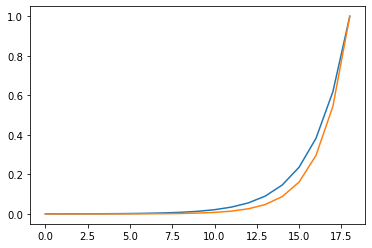

In [1]:
# Fibonacci retracements
import matplotlib.pyplot as plt

def fibFastRec(n):
    def fib(prvprv, prv, c):
        if c < 1: 
            return prvprv
        else: 
            return fib(prv, prvprv + prv, c - 1) 
    return fib(0, 1, n)

def fib2FastRec(n):
    def fib2(prvprvprv, prvprv, prv, c):
        if c < 2: 
            return prvprvprv + prvprv
        else: 
            return fib2(prvprv, prvprv + prv, prvprvprv + prvprv, c - 1) 
    return fib2(0, 1, 1, n)

def main():
    #print(fibFastRec(7))
    fibs = [fibFastRec(n) for n in range(1,20)]
    print(fibs)
    fibrts = [f / fibs[len(fibs)-1] for f in fibs]
    print(fibrts)
    fibs2 = [fib2FastRec(n) for n in range(1,20)]
    print(fibs2)
    fibrts2 = [f / fibs2[len(fibs2)-1] for f in fibs2]
    print(fibrts2)
    
    plt.plot(range(len(fibs2)), fibrts)
    plt.plot(range(len(fibs2)), fibrts2)
    plt.show()

if __name__ == '__main__':
    main()

1259 1259
lag  -5 0.9537351772326813
lag  -4 0.9533861119465196
lag  -3 0.9538639745168263
lag  -2 0.9544439592276798
lag  -1 0.9550369654976565
lag  0 0.9561130743762976
lag  1 0.9551960928964502
lag  2 0.9550994754868264
lag  3 0.9545514746687204
lag  4 0.9538060472695243
lag  5 0.9529172249293333


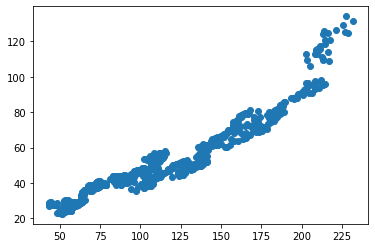

In [1]:
# correlation stock market - cryptocurr test 
import pandas as pd
import os
import matplotlib.pyplot as plt

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

def crosscorr(datax, datay, lag=0):
    '''lag crosscorrelation'''
    return datax.corr(datay.shift(lag))

def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

os.chdir(r'C:\Users\bscho\Documents\DL\lrgtxt0')
# Read data from file 'filename.csv' 
# Control delimiters, rows, column names with read_csv (see later) 
msftdata = pd.read_csv("MSFT.csv")
aapldata = pd.read_csv("AAPL.csv")
#btcdata = pd.read_csv("Cexio_BTCUSD_d.csv")
#ethdata = pd.read_csv("Cexio_ETHBTC_d.csv")

# Preview the first 5 lines of the loaded data 
#spdata.head()
#btcdata.head()

#print(btcdata['Close'])
#s0 = spdata['Close']
#s1 = btcdata['Close']
#dcomb = {'sp500': spdata['Close'], 'btcusd': btcdata['Close']}
#df = pd.DataFrame(data=dcomb)

#s0.corr(s1, method=histogram_intersection)
#df_new = df_shifted(df, 'sp500', lag=-1)
#print(df_new)
print(len(msftdata['Close']), len(aapldata['Close']))
for lg in range(-5,6):
    #print('lag ', lg, crosscorr(ndqdata['Close'][0:100], ethdata['Close'][0:100], lg))
    #print('lag ', lg, crosscorr(ndqdata['Close'], ethdata['Close'], lg))
    print('lag ', lg, crosscorr(msftdata['Close'], aapldata['Close'], lg))
    
plt.scatter(msftdata['Close'][0:1512], aapldata['Close'][0:1512])
plt.show()

1259


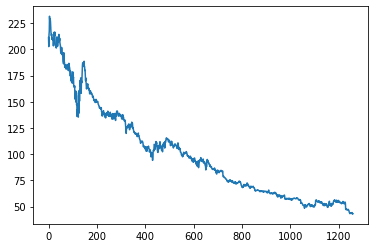

[(3, 0), (4, 0), (5, 0), (7, 0), (8, 0), (9, 0), (12, 0), (13, 0), (16, 0), (18, 0), (22, 0), (23, 0), (25, 0), (26, 0), (30, 0), (34, 0), (35, 0), (36, 0), (39, 0), (42, 0), (43, 0), (46, 0), (47, 0), (48, 0), (49, 0), (53, 0), (54, 0), (55, 0), (58, 0), (59, 0), (63, 0), (64, 0), (69, 0), (70, 0), (76, 0), (77, 0), (78, 0), (79, 0), (80, 0), (83, 0), (84, 0), (85, 0), (87, 0), (88, 0), (91, 0), (92, 0), (95, 0), (96, 0), (100, 0), (101, 0), (102, 0), (103, 0), (107, 0), (108, 0), (112, 0), (113, 0), (114, 0), (116, 0), (121, 0), (123, 0), (127, 0), (130, 0), (131, 0), (132, 0), (133, 0), (136, 0), (137, 0), (139, 0), (140, 0), (141, 0), (142, 0), (146, 0), (147, 0), (148, 0), (150, 0), (151, 0), (154, 0), (155, 0), (159, 0), (160, 0), (161, 0), (162, 0), (163, 0), (167, 0), (168, 0), (172, 0), (173, 0), (176, 0), (177, 0), (179, 0), (180, 0), (184, 0), (185, 0), (189, 0), (190, 0), (191, 0), (195, 0), (196, 0), (197, 0), (198, 0), (202, 0), (203, 0), (204, 0), (208, 0), (209, 0), (21

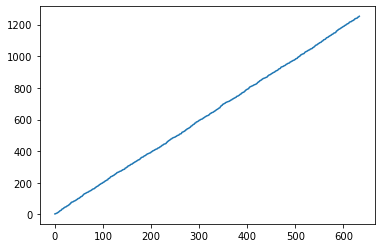

In [3]:
# feature detection 
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

def histogram_intersection(a, b):
    v = np.minimum(a, b).sum().round(decimals=1)
    return v

def crosscorr(datax, datay, lag=0):
    '''lag crosscorrelation'''
    return datax.corr(datay.shift(lag))

def df_shifted(df, target=None, lag=0):
    if not lag and not target:
        return df       
    new = {}
    for c in df.columns:
        if c == target:
            new[c] = df[target]
        else:
            new[c] = df[c].shift(periods=lag)
    return  pd.DataFrame(data=new)

def dtctft(data):
    '''detect features in data'''
    res = []
    #davrg = np.average(data) + np.std(data)
    for i in range(2,len(data)-2):
        #if data[i] > data[i-1] and data[i] > data[i+1] \
        #and data[i-1] > data[i-2] and data[i+1] > data[i+2]:
        if np.average(np.dot(data[i-2:i+3], [-1,2,3,2,-1])) > 5*np.average(data[i-2:i+3]):  
            res.append((i,0))
    return res

os.chdir(r'C:\Users\bscho\Documents\DL\lrgtxt0')
# Read data from file 'filename.csv' 
# Control delimiters, rows, column names with read_csv (see later) 
msftdata = pd.read_csv("MSFT.csv")
#aapldata = pd.read_csv("AAPL.csv")

print(len(msftdata['Close']))
#for lg in range(-5,6):
    #print('lag ', lg, crosscorr(msftdata['Close'], aapldata['Close'], lg))
    
#plt.scatter(msftdata['Close'][0:1512], aapldata['Close'][0:1512])
plt.plot(msftdata['Close'][0:1512])
plt.show()

pks = dtctft(msftdata['Close'])
print(pks)
#print([pks[i][0]/pks[0][0] for i in range(len(pks)-1)])

#plt.plot([pks[i][0]/pks[0][0] for i in range(len(pks)-1)])
plt.plot([pks[i][0] for i in range(len(pks)-1)])
plt.show()

In [1]:
[print("FizzBuzz") if i % 15 == 0 else print("Fizz") if i % 3 == 0 else print("Buzz") if i % 5 == 0 else print(i) for i in range(1,21)]

1
2
Fizz
4
Buzz
Fizz
7
8
Fizz
Buzz
11
Fizz
13
14
FizzBuzz
16
17
Fizz
19
Buzz


[None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None,
 None]

In [15]:
txt = 'the fox jumps over the lazy dog'
print([len(x) for x in txt.split(' ')])

[3, 3, 5, 4, 3, 4, 3]


In [13]:
# biorhythm
import math

def days(y, m, d):
    ''' input year and month are shifted to begin the year in march'''
    m = (m + 9) % 12 
    y = y - m/10
    ''' with (m*306 + 5)/10 the number of days from march 1 to the current 'm' month '''
    result = 365*y + y/4 - y/100 + y/400 + (m*306 + 5)/10 + ( d - 1 )
    return result
 
def diff(one, two):
    [y1, m1, d1] = one.split('-')
    [y2, m2, d2] = two.split('-')
    # strings to integers
    year2 = days(int(y2), int(m2), int(d2))
    year1 = days(int(y1), int(m1), int(d1))
    return year2 - year1
 
if __name__ == "__main__":
    bdt = input('Enter your birthdate (yyyy-mm-dd):')
    tdt = input("Enter today's date (yyyy-mm-dd):")
    #bdt = '1972-12-05'
    #bdt = '2020-09-09'
    dd = int(diff(bdt, tdt))
    print('physical: ' + str(math.sin(2*math.pi*(dd % 23) / 23 )))
    print('emotional: ' + str(math.sin(2*math.pi*(dd % 28) / 28 )))
    print('mental: ' + str(math.sin(2*math.pi*(dd % 33) / 33 )))

Enter your birthdate (yyyy-mm-dd):1973-04-05
Enter today's date (yyyy-mm-dd):2020-09-17
physical: -0.39840108984624156
emotional: 0.43388373911755823
mental: -0.7557495743542584


In [1]:
# metallic ratios
def lucconv(b, niter=100):
    '''Lucas sequence convergence'''
    if b <= 0:
        return 1
    xn1 = 1
    xn2 = 0
    for n in range(niter):
        xn = b*xn1 + xn2
        xn2 = xn1
        xn1 = xn
    return xn / xn2 # xn2 holds xn1 for last loop

if __name__ == "__main__":
    print(lucconv(0)) # plat
    print(lucconv(1)) # gold
    print(lucconv(2)) # silver
    print(lucconv(3)) # bronze

1
1.618033988749895
2.414213562373095
3.302775637731995


In [26]:
# sieve of E via yield
def intsfrom(n):
    while True:
        yield n
        n += 1

def sieve(ilist):
    p = next(ilist)
    yield p
    for q in sieve(n for n in ilist if n%p != 0):
        yield q

if __name__ == "__main__":
    ctr = 0
    try:
        for p in sieve(intsfrom(2)):
            print (p)
            ctr += 1
            if ctr > 20:
                break
        print ('')
    except RuntimeError as e:
        print (e)


2
3
5
7
11
13
17
19
23
29
31
37
41
43
47
53
59
61
67
71
73



In [1]:
# factorions
def fact(n):
    if n == 0:
        return 1
    return n*fact(n-1)

fl = [fact(n) for n in range(11)] # caching factorials

def isfctrn(n):
    dgl = [x for x in str(n)]
    #n0 = sum([fact(int(x)) for x in dgl])
    n0 = sum([fl[int(x)] for x in dgl])
    if n==n0:
        return True
    return False
    
if __name__ == "__main__":
    for n in range(50000):
        if isfctrn(n):
            print(n)

1
2
145
40585


In [1]:
# sqrt approx simple
import math

def sqrta0(x, niter=20):
    '''very simple square root approximation'''
    x0 = int(x/3)
    for i in range(1, niter):
        dx = 1 / i
        while x0*x0 > x:
            x0 -= dx
        x0 += dx
    return x0

def sqrta1(x, niter=10):
    '''very simple square root approximation'''
    x0 = x/3
    dx = 1
    for i in range(1, niter):
        while x0*x0 > x:
            x0 -= dx
        dx = (x - x0*x0) / 2**(i + 1)
    return x0 + 2*dx

if __name__ == "__main__":
    a = 156
    print('0:', sqrta0(a), math.sqrt(a))
    print('1:', sqrta1(a), math.sqrt(a))

0: 12.5 12.489995996796797
1: 12.0234375 12.489995996796797


In [10]:
import calendar
help(calendar.prcal)
 
#pryear(self, theyear, w=0, l=0, c=6, m=3)
calendar.prcal(1969)

Help on method pryear in module calendar:

pryear(theyear, w=0, l=0, c=6, m=3) method of calendar.TextCalendar instance
    Print a year's calendar.

                                  1969

      January                   February                   March
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
       1  2  3  4  5                      1  2                      1  2
 6  7  8  9 10 11 12       3  4  5  6  7  8  9       3  4  5  6  7  8  9
13 14 15 16 17 18 19      10 11 12 13 14 15 16      10 11 12 13 14 15 16
20 21 22 23 24 25 26      17 18 19 20 21 22 23      17 18 19 20 21 22 23
27 28 29 30 31            24 25 26 27 28            24 25 26 27 28 29 30
                                                    31

       April                      May                       June
Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su      Mo Tu We Th Fr Sa Su
    1  2  3  4  5  6                1  2  3  4                         1
 7  8  9 10 11 12 13       5  6  7  8  9

In [1]:
# table display
from IPython.core.display import display, HTML

def tblo(width=3):
    '''table output'''
    v = []
    a = v.append
    width = max(width, 1)
    a('<table border="0" cellpadding="0" cellspacing="0" class="%s">' % '2020')
    a('\n')
    a('<tr><th colspan="%d" class="%s">%s</th></tr>' % (width, '2020', 'theyear'))
    for i in range(1, 1+12, width):
        # months in this row
        months = range(i, min(i+width, 13))
        a('<tr>')
        for m in months:
            a('<td>')
            a(str(m))
            a('</td>')
        a('</tr>')
    a('</table>')
    return ''.join(v)

if __name__ == "__main__":
    display(HTML('<html>' + tblo() + '</html>'))

In [29]:
# ID webscraping
import requests
import sys
import os
import webbrowser
import bs4
import time
import random
import json
from collections import namedtuple
import csv

def getres(url): # get request http://docs.python-requests.org/en/master/user/quickstart/
    try:
        return requests.get(url, timeout=10.0)
    except Exception as e:
        msg = "Exception is:\n %s \n" % e
        print(msg)
        resf = namedtuple('res', 'content status_code')
        pt1 = resf('', 204)
        return resf # return a failed request

def __unicode__(self):
    return unicode(self.some_field) or u''
    
def main():
    '''read insolvenzticker'''
    
    ddataline = namedtuple('ddataline', 'name date iid jurisd')
    
    class ddataline:
        name = ''
        date = ''
        iid = ''
        jurisd = ''
        
        def __init__(self):
            self.name = ''
            self.date = ''
            self.iid = ''
            self.jurisd = ''
        def get_vals(self):
            return [self.name, self.date, self.iid, self.jurisd]
                    
    #brupdct = {} # bankrupcy dictionary
    outtext = ''

    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'requesting data from site...')    
        
    results = []

    for pgctr in range(4):
        if pgctr == 0:
            res = getres('https://xxxx') # https://www.akv.at/insolvenzticker?fwp_paged=2
        else:
            res = getres('https://xxxx?fwp_paged=' + str(pgctr+1))
        if res.status_code == 200:
            print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'processing page...')

            exsoup = bs4.BeautifulSoup(res.text, 'html.parser')

            #elems = exsoup.find(class_='facetwp-template').descendants
            elems = exsoup.find_all('article', class_='post-entry')
            if elems is not None:
                #print(elems)
                for idx, elem in enumerate(elems):
                    #print(idx, elem)
                    dtln = []
                    # dtln = ddataline()
                    for lnel in elem.find_all(class_='insocol'):
                        if lnel.string is not None:
                            dtln.append(lnel.string.strip())
                            # dtln.name = elem.string.strip()
                    results.append(dtln)
                    # brupdct[str(nentry)] = dtln.get_vals()

        time.sleep(random.randint(1, 3)) # wait a few seconds

    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'saving files...')

    os.chdir(r'C:\Users\xxxxxx')
    with open('brpcydt.csv', 'w', newline='') as csvfile:
        #csvwrtr = csv.writer(csvfile, delimiter=' ', quotechar='|', quoting=csv.QUOTE_MINIMAL)
        csvwrtr = csv.writer(csvfile, delimiter=',')
        for row in results:
            csvwrtr.writerow(row)
    
    print(time.strftime("%a, %d %b %Y %H:%M:%S", time.localtime(time.time())), 'completed!')
    
if __name__=="__main__":
    main()

Thu, 24 Sep 2020 15:59:43 requesting data from site...
Thu, 24 Sep 2020 15:59:43 processing page...
Thu, 24 Sep 2020 15:59:46 processing page...
Thu, 24 Sep 2020 15:59:49 processing page...
Thu, 24 Sep 2020 15:59:50 processing page...
Thu, 24 Sep 2020 15:59:51 saving files...
Thu, 24 Sep 2020 15:59:51 completed!


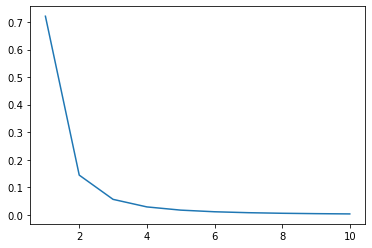

[1.0, 0.20010096085783546, 0.07807394844274639, 0.040040394536229, 0.023853429382973447, 0.015622672101358662, 0.010923414897647137, 0.008012121419826247, 0.006095541425440623, 0.004773094139287512]


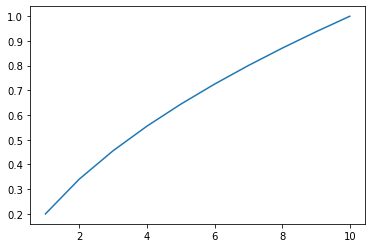

[1.0, 1.7071067811865475, 2.284457050376173, 2.784457050376173, 3.231670645876131, 3.6399189363399937, 4.017883409349221, 4.371436799942495, 4.704770133275828, 5.020997899292666]


In [41]:
import math
import matplotlib.pyplot as plt
# Zipf's law

def zipf(k, s, N):
    '''Zipf s distribution'''
    return 1/(k**s * sum([1/n**s for n in range(1,N+1)]))

def main():
    #print(zipf(1, 1.1, 10))
    x, y = [], []
    for k in range(1,11):
        x.append(k)
        y.append(zipf(k, 2.3212, 10)) # almost 80/20
    plt.plot(x, y)
    plt.show()
    print([yi/y[0] for yi in y])
    x, y = [], []
    for k in range(1,11):
        x.append(k)
        if k>1:
            y.append(y[k-2] + zipf(k, 0.5, 10)) # Price's law
        else:
            y.append(zipf(k, 0.5, 10))
    plt.plot(x, y)
    plt.show()
    print([yi/y[0] for yi in y])

if __name__=="__main__":
    main()

In [1]:
def zeta(s, niter=1000):
    return sum([1/k**s for k in range(1,niter)])

def intsfrom(n):
    while True:
        yield n
        n += 1

def sieve(ilist):
    p = next(ilist)
    yield p
    for q in sieve(n for n in ilist if n%p != 0):
        yield q
        
def primes235(limit):
    yield 2; yield 3; yield 5
    if limit < 7: return
    modPrms = [7,11,13,17,19,23,29,31]
    gaps = [4,2,4,2,4,6,2,6,4,2,4,2,4,6,2,6] # 2 loops for overflow
    ndxs = [0,0,0,0,1,1,2,2,2,2,3,3,4,4,4,4,5,5,5,5,5,5,6,6,7,7,7,7,7,7]
    lmtbf = (limit + 23) // 30 * 8 - 1 # integral number of wheels rounded up
    lmtsqrt = (int(limit ** 0.5) - 7)
    lmtsqrt = lmtsqrt // 30 * 8 + ndxs[lmtsqrt % 30] # round down on the wheel
    buf = [True] * (lmtbf + 1)
    for i in range(lmtsqrt + 1):
        if buf[i]:
            ci = i & 7; p = 30 * (i >> 3) + modPrms[ci]
            s = p * p - 7; p8 = p << 3
            for j in range(8):
                c = s // 30 * 8 + ndxs[s % 30]
                buf[c::p8] = [False] * ((lmtbf - c) // p8 + 1)
                s += p * gaps[ci]; ci += 1
    for i in range(lmtbf - 6 + (ndxs[(limit - 7) % 30])): # adjust for extras
        if buf[i]: yield (30 * (i >> 3) + modPrms[i & 7])
        
def euler(s, niter=1000):
    den = 1.
    for p in list(primes235(niter)):
        den *= (1-1/p)**s
    return 1 / den
        
def main():
    print(zeta(2))
    print(euler(2))

if __name__=="__main__":
    main()

1.6439335666815615
152.54660009607557


In [1]:
# truth tables
import pandas as pd
from itertools import product

def f(w,x,y,z):
    return (x and y) and (w or z)

def truth_table(f):
    values = [list(x) + [f(*x)] for x in product([False,True], repeat=f.__code__.co_argcount)] # __x__ to access function properties
    return pd.DataFrame(values,columns=(list(f.__code__.co_varnames) + [f.__name__]))

def main():
    print(truth_table(f))

if __name__=="__main__":
    main()

        w      x      y      z      f
0   False  False  False  False  False
1   False  False  False   True  False
2   False  False   True  False  False
3   False  False   True   True  False
4   False   True  False  False  False
5   False   True  False   True  False
6   False   True   True  False  False
7   False   True   True   True   True
8    True  False  False  False  False
9    True  False  False   True  False
10   True  False   True  False  False
11   True  False   True   True  False
12   True   True  False  False  False
13   True   True  False   True  False
14   True   True   True  False   True
15   True   True   True   True   True


In [2]:
# stairs
def nstrs(n, strds):
    '''number of ways to climb n stairs given strides (generalized Fibonacci)'''
    if len(strds) == 0:
        return 1
    if len(strds) == 1:
        if n % strds[0] == 0:
            return 1
        return 0
    return sum([nstrs(n-strd, [x for x in strds if x <= n-strd]) for strd in strds])

def main():
    print(nstrs(5, [1,2]))
    print(nstrs(5, [1,2,3]))

if __name__=="__main__":
    main()

8
13


In [7]:
import math
import random

def sqrtex(n):
    base = random.randint(2,n)
    expn = random.randint(2,n)
    expsq = expn % 2
    fctr = base ** ((expn - expsq) / 2)
    return (fctr, base, expsq, expn)

def main():
    print(sqrtex(8))

if __name__=="__main__":
    main()

(27.0, 3, 0, 6)


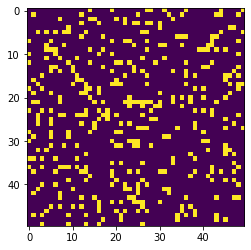

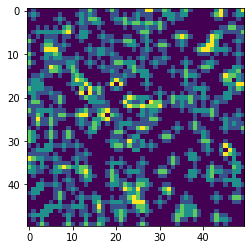

In [1]:
# Abelian sandpile
import random
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

def tblo(table):
    '''table output'''
    width = len(table)
    v = []
    a = v.append
    width = max(width, 1)
    a('<table border="0" cellpadding="0" cellspacing="0" class="%s">' % '2020')
    a('\n')
    for i in range(width):
        a('<tr>')
        for m in table[i]:
            a('<td>')
            a(str(m))
            a('</td>')
        a('</tr>')
    a('</table>')
    return ''.join(v)

def distr(grid, nlim=4):
    '''distribute all >= nlim sandpiles in grid'''
    for i in range(len(grid)):
        for j in range(len(grid[0])):
            while grid[i][j] >= nlim:
                grid[i][j] -= nlim
                grid[max(i-1,0)][j] += int(nlim/4)
                grid[min(i+1,len(grid)-1)][j] += int(nlim/4)
                grid[i][max(j-1,0)] += int(nlim/4)
                grid[i][min(j+1,len(grid[0])-1)] += int(nlim/4)
    return grid

def main():
    nsize = 50
    mygrid = [[random.choice([0,0,0,0,0,7]) for j in range(nsize)] for _ in range(nsize)]
    #display(HTML('<html>' + tblo(mygrid) + '</html>'))
    #print(sum([sum(x) for x in mygrid]))
    plt.imshow(mygrid)
    plt.show()
    
    niter = 0
    while max([max(x) for x in mygrid]) > 3 and niter<1000:
        mygrid = distr(mygrid, 5)
        niter += 1
    #display(HTML('<html>' + tblo(mygrid) + '</html>'))
    #print(sum([sum(x) for x in mygrid]))
    
    plt.imshow(mygrid)
    plt.show()

if __name__=="__main__":
    main()